<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-inspection" data-toc-modified-id="Data-inspection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data inspection</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Carbohydrate-density-per-dollar" data-toc-modified-id="Carbohydrate-density-per-dollar-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Carbohydrate density per dollar</a></span></li><li><span><a href="#Carbs-per-gram" data-toc-modified-id="Carbs-per-gram-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Carbs per gram</a></span></li><li><span><a href="#Calories-density-per-dollar" data-toc-modified-id="Calories-density-per-dollar-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Calories density per dollar</a></span></li><li><span><a href="#Sodium-per-dollar" data-toc-modified-id="Sodium-per-dollar-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sodium per dollar</a></span></li><li><span><a href="#Sodium-per-Gram" data-toc-modified-id="Sodium-per-Gram-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Sodium per Gram</a></span></li><li><span><a href="#Caffeine" data-toc-modified-id="Caffeine-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Caffeine</a></span></li></ul></li></ul></div>

The purpose of this sheet is to analyse database that has been created for dontbonk.io ironman nutrition planner. I've collected data for most popular nutrition items that are used during ultra-endurance events. Key components of the database are: nutrition facts, price per surving, serving size and weight to normalize data. 

The key target is to find the most efficient nutrition items in every category with respect to nutritional density, nutrition per unit of cost and other metrics. 

The database is last updated in Jan 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Data inspection

In [2]:
data = pd.read_csv('/Users/inikiforov/Python/django/dontbonk/drafts/nutrition.csv')

In [3]:
data.head()

,id,full_name,short_name,brand_name,drink,category,calories,carbs,liquid,sodium,caffene,price,carry_weight,directions
0,84,PURE Endurance Formula,pure_endurance,PURE,1,drink,107,21,500,200,0,1.62,500.0,None
1,83,PURE Electrolyte Hydration,pure_electrolyte,PURE,1,sodium_drink,50,13,250,100,0,0.64,250.0,None
2,82,PURE Electrolyte Replacement Capsules,pure_caps,PURE,0,sodium_food,0,0,0,173,0,0.36,1.0,None
3,81,PURE Fluid Energy Gel,pure_fluid_gel,PURE,0,food,105,26,0,30,0,2.59,50.0,None
4,80,PURE Energy Gel,pure_gel,PURE,0,food,95,23,0,49,0,2.59,35.0,None


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            82 non-null     int64  
 1   full_name     82 non-null     object 
 2   short_name    82 non-null     object 
 3   brand_name    82 non-null     object 
 4   drink         82 non-null     int64  
 5   category      82 non-null     object 
 6   calories      82 non-null     int64  
 7   carbs         82 non-null     int64  
 8   liquid        82 non-null     int64  
 9   sodium        82 non-null     int64  
 10  caffene       82 non-null     int64  
 11  price         82 non-null     float64
 12  carry_weight  82 non-null     float64
 13  directions    82 non-null     object 
dtypes: float64(2), int64(7), object(5)
memory usage: 9.1+ KB


Data description: 

* id - database item id
* full_name - full name of the item including brand name
* short_name - short name used in dontbonk.io algorithm
* brand_name - name of the brand
* drink - shows if an item is drinkable and can be stored into a normal bottle
* category - shows category of an item
    * drink - carbohydrate drink
    * food - gels and other hardish carbohydrate food
    * sodium drink - electrolyte drinks
    * sodium food - hard sodium in form of tabs, capsules or powders, some of them can also be dissolved
    * water - aid station water (single item)
* calories - calories per serving in kkal
* carbs - carbohydrates per serving in g
* liquid - recommended amount of fluid to dissolve an single serving
* sodium - sodium ammount in mg in a single serving
* caffene - caffeine ammount in mg in a single serving
* price - price calculated for a single serving
* carry_weight - approx weight of an item in g
* directions - comments and other information on a record

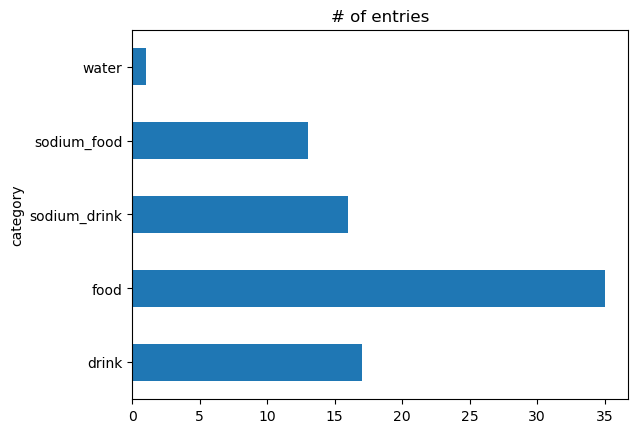

In [5]:
data.groupby('category')['price'].count().plot(kind = 'barh', title = '# of entries')

plt.show()

Will change some category names to better reflect the kind of nutrition in the specific category

* drink -> carbohydrate_drink
* food - > carbohydrate_food

In [6]:
data['category'] = data['category'].where(data['category'] != 'drink', 'carbohydrate_drink')

In [7]:
data['category'] = data['category'].where(data['category'] != 'food', 'carbohydrate_food')

In [8]:
data.head()

,id,full_name,short_name,brand_name,drink,category,calories,carbs,liquid,sodium,caffene,price,carry_weight,directions
0,84,PURE Endurance Formula,pure_endurance,PURE,1,carbohydrate_drink,107,21,500,200,0,1.62,500.0,None
1,83,PURE Electrolyte Hydration,pure_electrolyte,PURE,1,sodium_drink,50,13,250,100,0,0.64,250.0,None
2,82,PURE Electrolyte Replacement Capsules,pure_caps,PURE,0,sodium_food,0,0,0,173,0,0.36,1.0,None
3,81,PURE Fluid Energy Gel,pure_fluid_gel,PURE,0,carbohydrate_food,105,26,0,30,0,2.59,50.0,None
4,80,PURE Energy Gel,pure_gel,PURE,0,carbohydrate_food,95,23,0,49,0,2.59,35.0,None


Also will drop water, since it is a technical record, that has no use for this particulart analysis. 

In [9]:
data.query('category == "water"').index

Int64Index([65], dtype='int64')

In [10]:
data = data.drop(data.query('category == "water"').index[0], axis = 0)

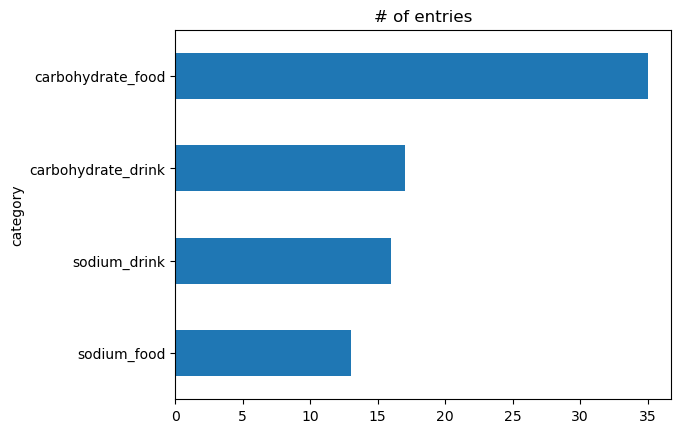

In [11]:
data.groupby('category')['price'].count().sort_values().plot(kind = 'barh', title = '# of entries')

plt.show()

In [12]:
data.groupby('category')['price'].count().sort_values(ascending = False)

category
carbohydrate_food     35
carbohydrate_drink    17
sodium_drink          16
sodium_food           13
Name: price, dtype: int64

Our dataset has 81 nutrition items, of which there are 35 carbohydrate foods - which are solid or semi-solid sources of carbs, 17 carbohydrate drinks, 16 sodium electrolyte drinks and 13 sodium foods (something that can be consumed without water). 

In [13]:
data.groupby('brand_name')['price'].count().sort_values(ascending = False)

brand_name
Hammer Nutrition        9
Precision Hydration     9
GU                      8
Skratch Labs            7
Maurten                 7
SiS                     6
Gatorade                5
CLIF                    5
PURE                    5
NUUN                    4
UCAN                    2
INFINIT                 2
SaltStick               2
Propel                  1
The Right Stuff         1
Red Bull                1
Best Maid Dill Juice    1
LMNT                    1
Kirkland                1
Judee's                 1
Coca-Cola               1
Cavendish               1
Mars                    1
Name: price, dtype: int64

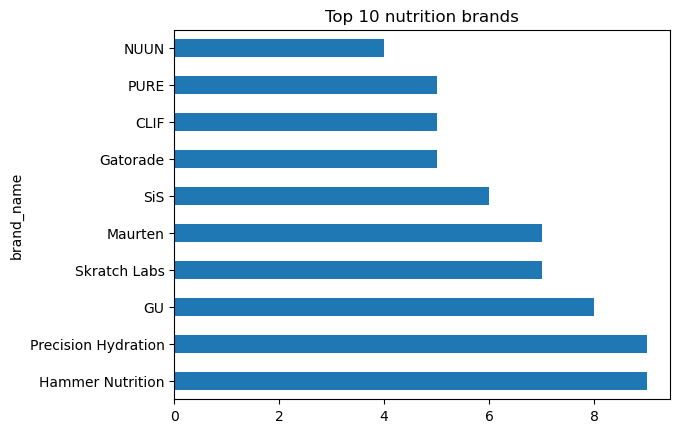

In [14]:
data.groupby('brand_name')['price'].count().sort_values(ascending = False).head(10).plot(kind = 'barh', title = 'Top 10 nutrition brands')

plt.show()

Most well-represented brands are: Hammer Nutrition, Precision Fuel and Hydration, GU, Skratch Labs, Maurten and SiS.

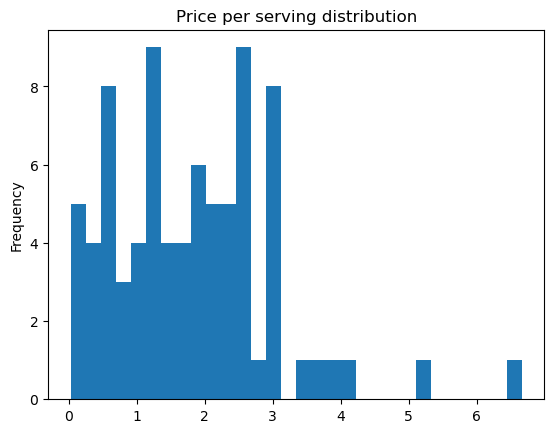

In [15]:
data['price'].plot(kind = 'hist', xlabel = "Price per serving, USD", bins = 30, title = 'Price per serving distribution')

plt.show()

## Analysis

### Carbohydrate density per dollar

We will use price per serving and carbs per serving to determine the most carb-dense nutrition. This will show us which nutrition is best in terms of bang for the buck.

This analysis is relevant for carbohydrate food and drinks.

In [16]:
data['carb_per_dollar'] = data['carbs']/data['price']

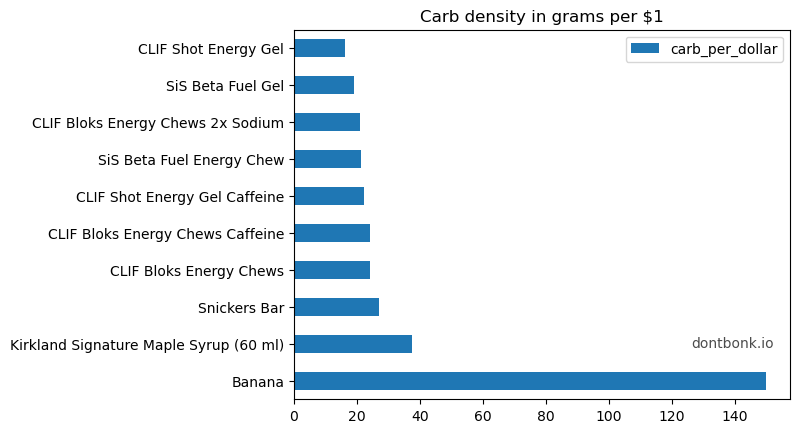

In [17]:
ax = data.query('category == "carbohydrate_food"').sort_values(
    'carb_per_dollar', 
    ascending = False).head(10).plot(
    kind = 'barh', 
    y = 'carb_per_dollar', 
    x = 'full_name',
    title = 'Carb density in grams per $1',
    xlabel = '')

ax.text(0.8, 0.14, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)

plt.show()

The price of the bananas is 0.20 cents per serving. Which shows it to be an incredibly dense source of carbs in terms of carbs per dollar. 2nd and 3rd most dense foods are Maple syrup and Snickers bar. 

In terms of purpose-made nutrition brands clear leaders here are SiS and CLIF with their gel and chews offering. 

SiS Beta Fuel is considered a more high-end source.

Same analysis for carbohydrate drinks.

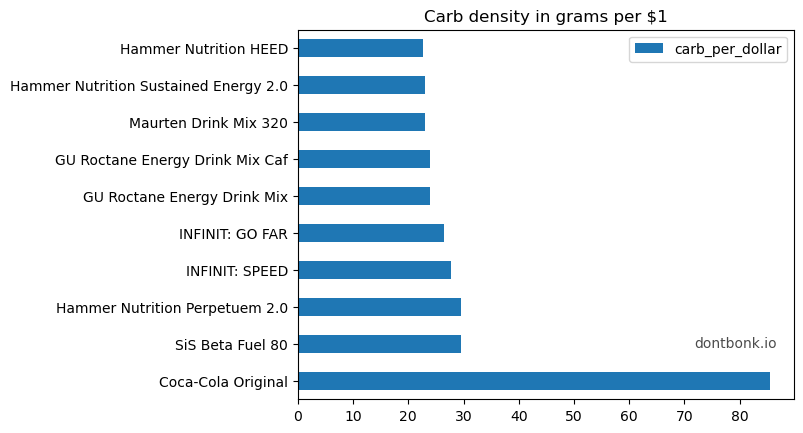

In [18]:
ax = data.query('category == "carbohydrate_drink"')\
    .sort_values('carb_per_dollar', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'carb_per_dollar', 
    x = 'full_name', 
    title = 'Carb density in grams per $1',
    xlabel = '')

ax.text(0.8, 0.14, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)

plt.show()

Here a supermarket consumer staple is also in the lead - Coca-Cola original is a tried and true choice for when there is no other choice.

Top 3 here are: 

* SiS Beta Fuel
* Hammer Nutrition Perpetuem 2.0
* INFINIT: Speed

Again SiS is a leader in terms of density per dollar.

### Carbs per gram

Another metric could be carb density per gram of carrying weight or serving weight. This shows how dense the final product is and if you can optimize the weight you are carrying towards carrying less weight and more energy sources. 

First lets see best products in terms of carbs per serving

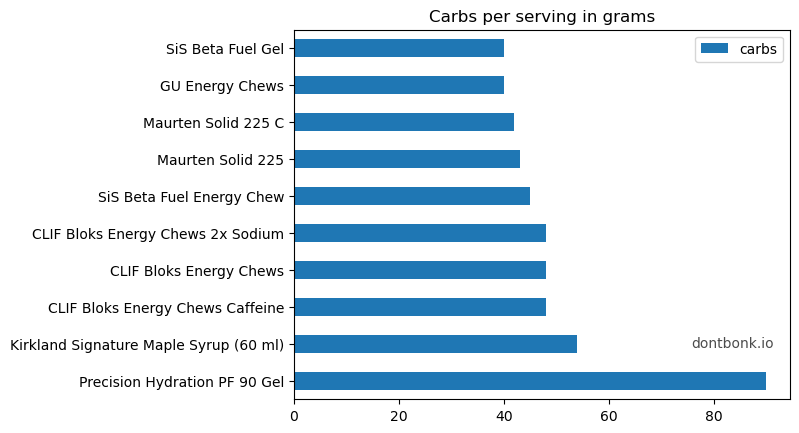

In [19]:
ax = data.query('category == "carbohydrate_food"')\
    .sort_values('carbs', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'carbs', 
    x = 'full_name', 
    title = 'Carbs per serving in grams',
    xlabel = '')

ax.text(0.8, 0.14, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)

plt.show()

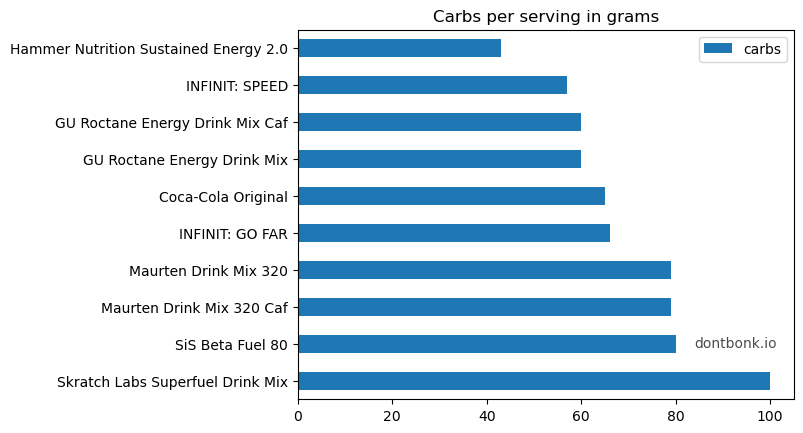

In [20]:
ax = data.query('category == "carbohydrate_drink"')\
    .sort_values('carbs', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'carbs', 
    x = 'full_name', 
    title = 'Carbs per serving in grams',
    xlabel = '')

ax.text(0.8, 0.14, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)


plt.show()

Now we can analyze which nutrtition has the most carbs per carrying gram.

In [21]:
data['carbs_per_gram'] = data['carbs']/data['carry_weight']

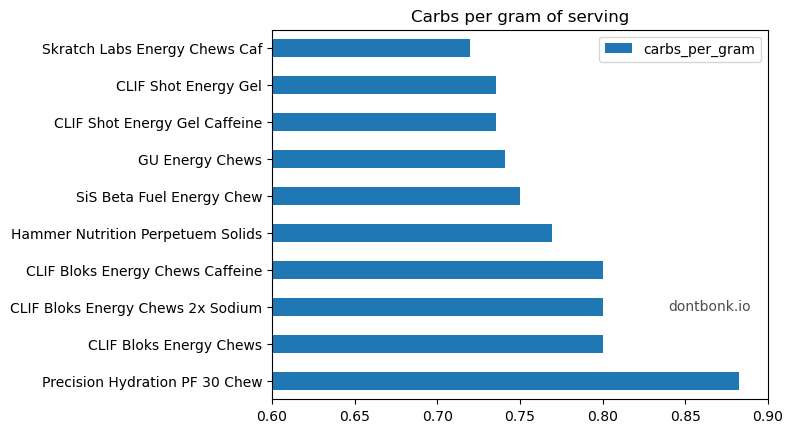

In [22]:
ax = data.query('category == "carbohydrate_food"')\
    .sort_values('carbs_per_gram', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'carbs_per_gram', 
    x = 'full_name', 
    title = 'Carbs per gram of serving',
    xlabel = '',
    xlim = (0.6, 0.9))

ax.text(0.8, 0.24, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)


plt.show()

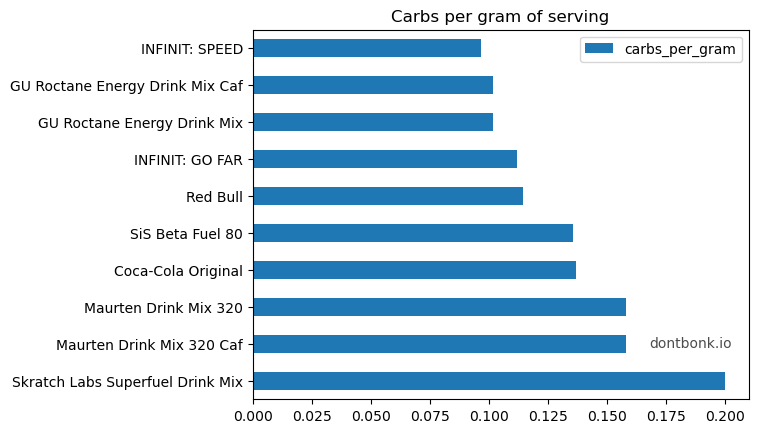

In [23]:
ax = data.query('category == "carbohydrate_drink"')\
    .sort_values('carbs_per_gram', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'carbs_per_gram', 
    x = 'full_name', 
    title = 'Carbs per gram of serving',
    xlabel = '')

ax.text(0.8, 0.14, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)


plt.show()

All top rated products are chews. But gels seem to be a much more popular choice. Lets sort out gels and Chews

In [24]:
def chews_detector(row):
    full_name = row['full_name'].lower()
    if 'chew' in full_name or 'solids' in full_name or 'solid' in full_name:
        return True
    else:
        return False

In [25]:
data['chews'] = data.apply(chews_detector, axis = 1)

In [26]:
data.head()

,id,full_name,short_name,brand_name,drink,category,calories,carbs,liquid,sodium,caffene,price,carry_weight,directions,carb_per_dollar,carbs_per_gram,chews
0,84,PURE Endurance Formula,pure_endurance,PURE,1,carbohydrate_drink,107,21,500,200,0,1.62,500.0,None,12.962963,0.042000,False
1,83,PURE Electrolyte Hydration,pure_electrolyte,PURE,1,sodium_drink,50,13,250,100,0,0.64,250.0,None,20.312500,0.052000,False
2,82,PURE Electrolyte Replacement Capsules,pure_caps,PURE,0,sodium_food,0,0,0,173,0,0.36,1.0,None,0.000000,0.000000,False
3,81,PURE Fluid Energy Gel,pure_fluid_gel,PURE,0,carbohydrate_food,105,26,0,30,0,2.59,50.0,None,10.038610,0.520000,False
4,80,PURE Energy Gel,pure_gel,PURE,0,carbohydrate_food,95,23,0,49,0,2.59,35.0,None,8.880309,0.657143,False


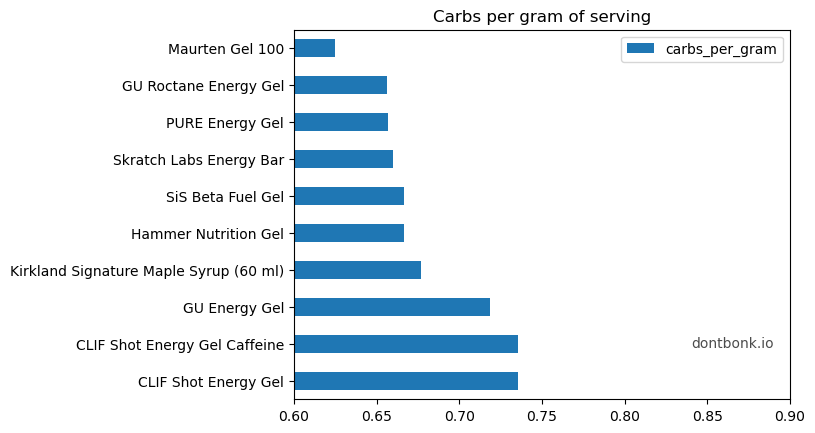

In [27]:
ax = data.query('category == "carbohydrate_food" and chews == False')\
    .sort_values('carbs_per_gram', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'carbs_per_gram', 
    x = 'full_name', 
    title = 'Carbs per gram of serving',
    xlabel = '', 
    xlim = (0.6,0.9))

ax.text(0.8, 0.14, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)


plt.show()

### Calories density per dollar

Even though calories are usually not a consideration even for ironman distance it could be nice to know

In [28]:
data['calories_per_dollar'] = data['calories']/data['price']

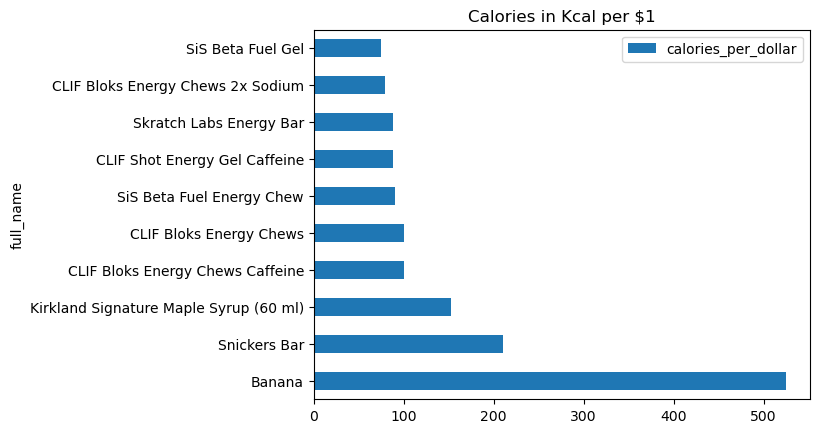

In [29]:
data.query('category == "carbohydrate_food"')\
    .sort_values('calories_per_dollar', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'calories_per_dollar', 
    x = 'full_name',
    title = 'Calories in Kcal per $1')

plt.show()

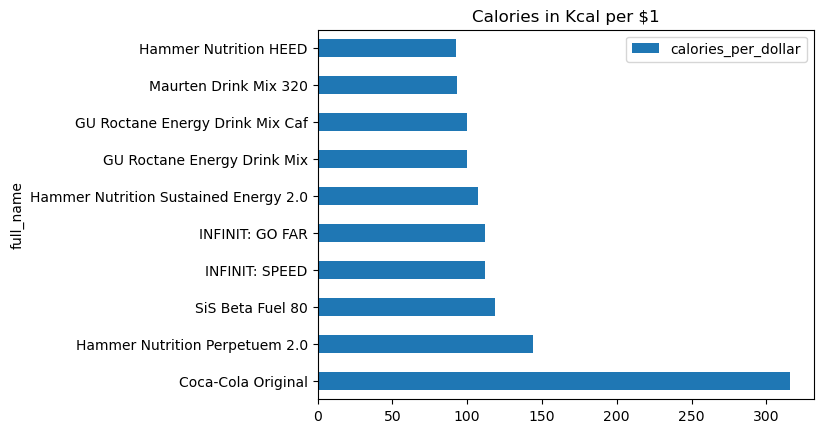

In [30]:
data.query('category == "carbohydrate_drink"')\
    .sort_values('calories_per_dollar', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'calories_per_dollar', 
    x = 'full_name',
    title = 'Calories in Kcal per $1')

plt.show()

### Sodium per dollar

Salt used to be a strategic resource. Lets see how much salty bang you can get from your buck.

In [31]:
data['sodium_per_dollar'] = data['sodium']/data['price']

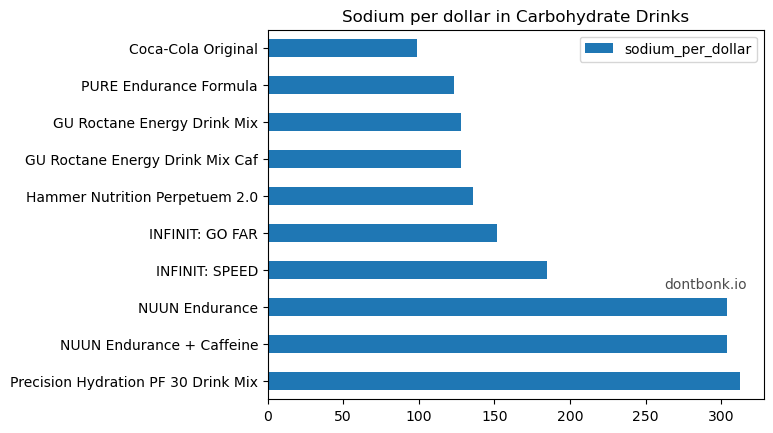

In [32]:
ax = data.query('category == "carbohydrate_drink"')\
    .sort_values('sodium_per_dollar', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'sodium_per_dollar', 
    x = 'full_name', 
    title = 'Sodium per dollar in Carbohydrate Drinks',
    xlabel = '')

ax.text(0.8, 0.3, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)


plt.show()

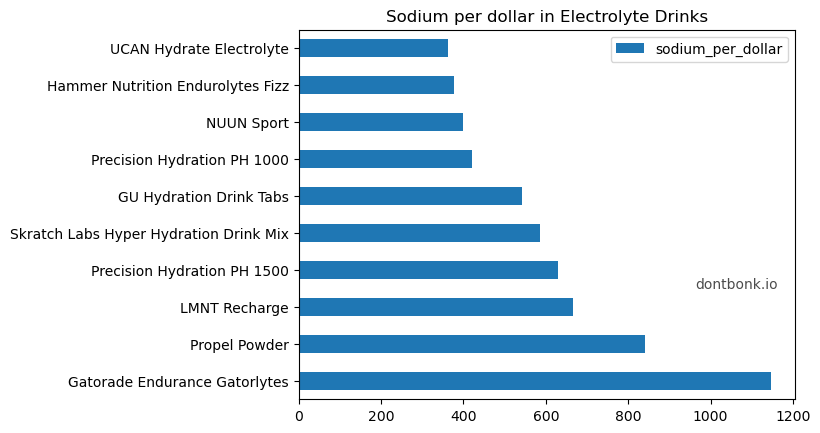

In [41]:
ax = data.query('category == "sodium_drink" or short_name == "gatorade_gatorlytes"')\
    .sort_values('sodium_per_dollar', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'sodium_per_dollar', 
    x = 'full_name', 
    title = 'Sodium per dollar in Electrolyte Drinks',
    xlabel = '')

ax.text(0.8, 0.3, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)


plt.show()

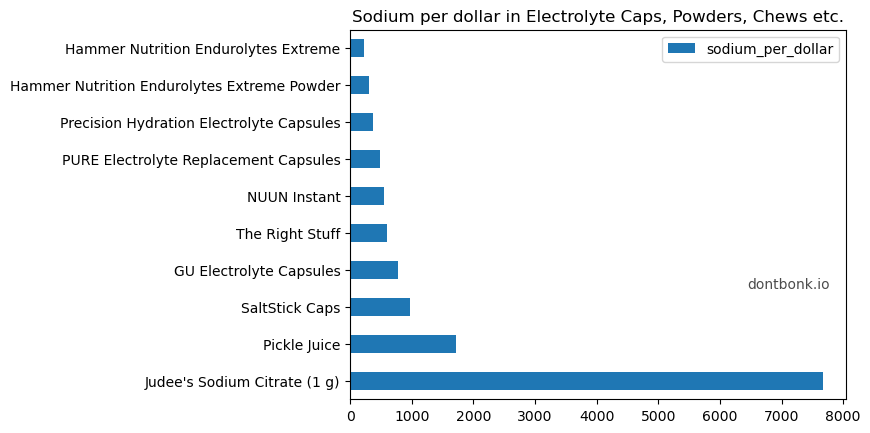

In [34]:
ax = data.query('category == "sodium_food" and short_name != "gatorade_gatorlytes"')\
    .sort_values('sodium_per_dollar', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'sodium_per_dollar', 
    x = 'full_name', 
    title = 'Sodium per dollar in Electrolyte Caps, Powders, Chews etc.',
    xlabel = '')

ax.text(0.8, 0.3, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)


plt.show()

### Sodium per Gram

In [35]:
data['sodium_per_gram'] = data['sodium']/data['carry_weight']

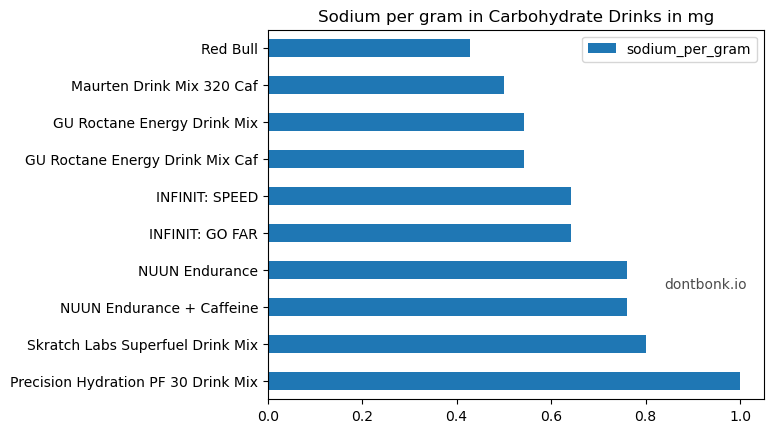

In [36]:
ax = data.query('category == "carbohydrate_drink"')\
    .sort_values('sodium_per_gram', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'sodium_per_gram', 
    x = 'full_name', 
    title = 'Sodium per gram in Carbohydrate Drinks in mg',
    xlabel = '')

ax.text(0.8, 0.3, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)


plt.show()

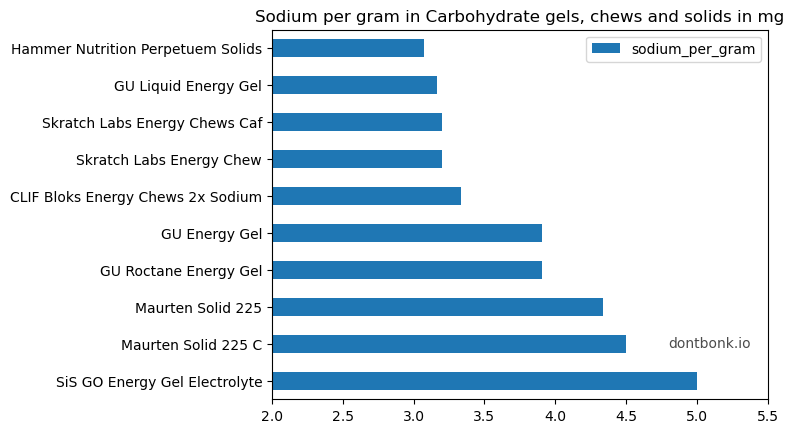

In [37]:
ax = data.query('category == "carbohydrate_food"')\
    .sort_values('sodium_per_gram', ascending = False)\
    .head(10)\
    .plot(
    kind = 'barh', 
    y = 'sodium_per_gram', 
    x = 'full_name', 
    title = 'Sodium per gram in Carbohydrate gels, chews and solids in mg',
    xlabel = '',
    xlim = (2, 5.5))

ax.text(0.8, 0.14, 'dontbonk.io', transform=ax.transAxes, color='black', alpha=0.7)


plt.show()

### Caffeine

In [38]:
data['caffeine_per_dollar'] = data['price']/data['caffene']

<AxesSubplot:ylabel='short_name'>

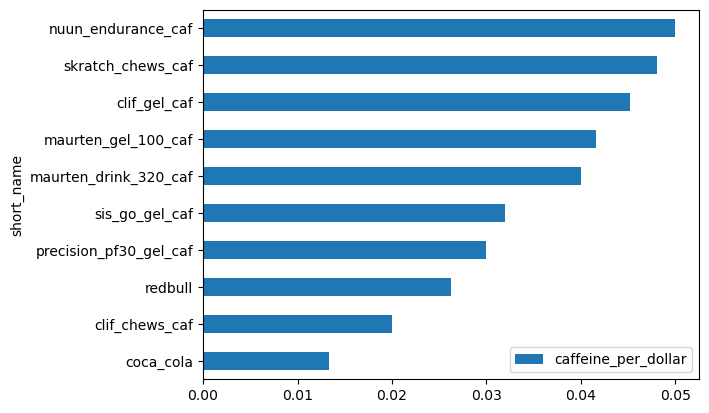

In [39]:
data.sort_values('caffeine_per_dollar', ascending = True).head(10).plot(kind = 'barh', y = 'caffeine_per_dollar', x = 'short_name')